Установка библиотек

In [8]:
!pip3 install -U pandas
import pandas as pd
!pip3 install requests
import multiprocessing
import requests
!pip install bs4
import bs4 as bs
import re
import csv
from datetime import datetime, timedelta
import os
from urllib.parse import urljoin

In [9]:
!pip install tensorflow imageio matplotlib
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import imageio
from sklearn.model_selection import train_test_split


In [10]:
from tensorflow.keras.models import Model
from PIL import Image


Переписанный парсер с лабы №1 для сбора изображений (заставок) фильмов сайта https://www.film.ru/compilation

In [ ]:
def get_soup(url):
  try:
        result = requests.get(url, headers)
        result.raise_for_status()
        if not result.text:
            print("Страница пустая.")
            return None
        return bs.BeautifulSoup(result.text, 'html.parser')

  except requests.exceptions.HTTPError as http_err:
        print(f"HTTP ошибка: {http_err}")
  except requests.exceptions.ConnectionError:
        print("Ошибка соединения: не удалось подключиться к серверу.")
  except requests.exceptions.Timeout:
        print("Ошибка таймаута: запрос превысил время ожидания.")
  except requests.exceptions.RequestException as req_err:
        print(f"Ошибка запроса: {req_err}")

  return None

In [ ]:
main_url='https://www.film.ru/compilation/page/'
cur_url = 'https://www.film.ru/compilation/'
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:130.0) Gecko/20100101 Firefox/130.0'}

save_folder = 'images'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Функция для скачивания изображений
def download_image(image_url, save_path):
    try:
        response = requests.get(image_url, headers=headers, stream=True)
        response.raise_for_status()  # Проверяем успешность запроса

        with open(save_path, 'wb') as f:
            for chunk in response.iter_content(1024):
                f.write(chunk)
        print(f"Изображение сохранено: {save_path}")
    except Exception as e:
        print(f"Не удалось скачать изображение {image_url}: {e}")

image_sources = []

# Перебор страниц
for page in range (0,1):
  newUrl = main_url+f"{page}"
  categories_page = get_soup(newUrl)
  page = page+1
  categories = categories_page.find_all('div', class_='wrapper_movies_compilations')

  for count in range(0,10):
    cat_link = categories[0].find_all('a')[count].attrs
    count=count+1
    string = ""
    for key,item in cat_link.items():
        string = item
        refac_string = string[12:]
        films_page = get_soup(cur_url+refac_string)
        strr = cur_url+refac_string
        films = films_page.find_all('div', class_='redesign_afisha_movies')
        tags = films_page.find_all('div', class_='redesign_afisha_movie')
        count = len(tags)

        for film in films:
          for i in range (0,count):
            img = film.find_all('a', class_='wrapper_block_stack')[i]
            img_tag = img.find('img')
            if img_tag:
               img_attrs = img_tag.attrs

               if 'src' in img_attrs:
                 image_sources.append(img_attrs['src'])

# Скачивание и сохранение изображений
for i, src in enumerate(image_sources):
    img_url = urljoin(cur_url, src)

    img_name = f"image_{i + 1}.jpg"
    save_path = os.path.join(save_folder, img_name)

    download_image(img_url, save_path)


Изображение сохранено: images/image_1.jpg
Изображение сохранено: images/image_2.jpg
Изображение сохранено: images/image_3.jpg
Изображение сохранено: images/image_4.jpg
Изображение сохранено: images/image_5.jpg
Изображение сохранено: images/image_6.jpg
Изображение сохранено: images/image_7.jpg
Изображение сохранено: images/image_8.jpg
Изображение сохранено: images/image_9.jpg
Изображение сохранено: images/image_10.jpg
Изображение сохранено: images/image_11.jpg
Изображение сохранено: images/image_12.jpg
Изображение сохранено: images/image_13.jpg
Изображение сохранено: images/image_14.jpg
Изображение сохранено: images/image_15.jpg
Изображение сохранено: images/image_16.jpg
Изображение сохранено: images/image_17.jpg
Изображение сохранено: images/image_18.jpg
Изображение сохранено: images/image_19.jpg
Изображение сохранено: images/image_20.jpg
Изображение сохранено: images/image_21.jpg
Изображение сохранено: images/image_22.jpg
Изображение сохранено: images/image_23.jpg
Изображение сохранен

Будем работать только с ~1000 изображениями, сократим датасет (с учетом ограничений по тз)

---



In [ ]:
#код для парсинга обложек папок (вдруг тоже пригодится)
#for page in range(0, 1):
 #   newUrl = main_url + f"{page}"
  #  categories_page = get_soup(newUrl)
   # categories = categories_page.find_all('div', class_='wrapper_movies_compilations')

    #for count in range(0, 36):
     #   cat_link = categories[0].find_all('a')[count]
       # img_tag = cat_link.find('img')

        #if img_tag:
         #   img_attrs = img_tag.attrs
          #  if 'src' in img_attrs:
           #     image_sources.append(img_attrs['src'])

Обработка изображений (снижение размерностей, нормализация и тд)

In [11]:
import cv2
import os
import numpy as np

# Параметры
img_height, img_width = 50, 50  # Новое разрешение для изображений
latent_dim = 64  # Размер латентного пространства


def load_and_resize_images(folder, image_size=(50, 50)):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(data_folder, filename)
            img = load_img(img_path, target_size=image_size)
            images.append(img)
    return np.array(images)

# Загрузка данных
data_folder = '/content/drive/MyDrive/images'
images = load_and_resize_images(data_folder)
images = images.astype('float32') / 255.0  # Нормализация
print(f"Загружено изображений: {len(images)}")
print(f"Форма изображений: {images.shape}")


Загружено изображений: 1028
Форма изображений: (1028, 50, 50, 3)


In [4]:
#сохраним исходники тоже
def load_images(image_folder, image_size=(300, 300)):
    original_images = []
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(image_folder, filename)
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Нормализация
            original_images.append(img_array)
    return np.array(original_images)


image_folder = '/content/drive/MyDrive/images'
original_images = load_images(image_folder)
print(f"Загружено изображений: {len(original_images)}")
print(f"Форма изображений: {original_images.shape}")

Загружено изображений: 1028
Форма изображений: (1028, 300, 300, 3)


Реализация модели AutoEncoder и ее обучение

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
# Определение модели AutoEncoder
input_img = Input(shape=(img_height, img_width, img_channels))

# Кодировщик
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
latent_space = Dense(latent_dim, activation='relu')(x)

# Декодировщик
x = Dense(128, activation='relu')(latent_space)
x = Dense(img_height * img_width * img_channels, activation='sigmoid')(x)
output_img = Reshape((img_height, img_width, img_channels))(x)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')  # L2 loss

# Обучение модели
autoencoder.fit(images, images, epochs=200, batch_size=32, shuffle=True)

Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1107
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0819
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0733
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0680
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0664
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0624
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0609
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0566
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0547
Epoch 10/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0535
Epoch 11/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0525
Epoch 12/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0538
Epoch 13/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0497
Epoch 14/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0500
Epoch 15/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


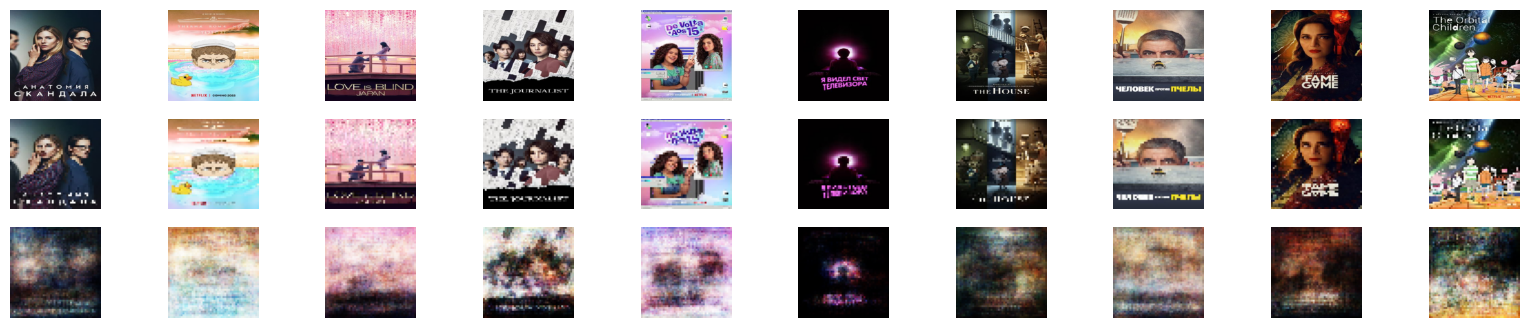

In [ ]:
import matplotlib.pyplot as plt

# Получение первых 10 изображений для вывода
decoded_images = autoencoder.predict(images[:10])  # Получаем восстановленные изображения

# Отображение оригинальных и восстановленных изображений
plt.figure(figsize=(20, 4))

for i in range(10):
   # Оригинальные изображения
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(original_images[i])
    plt.axis('off')

    # Оригинальные сжатые изображения
    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(images[i])
    plt.axis('off')

    # Восстановленные изображения
    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(decoded_images[i])
    plt.axis('off')

plt.show()


Проверка качества модели

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


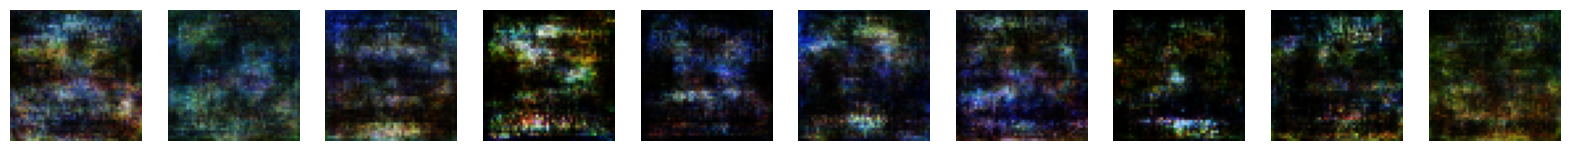

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Проверка качества модели: генерация изображений из случайных латентных векторов
def generate_images(num_images):
    random_latent_vectors = np.random.normal(size=(num_images, 50,50,3))

    # Генерация изображений с помощью декодера
    generated_images = autoencoder.predict(random_latent_vectors)

    return generated_images

generated_images = generate_images(10)
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(generated_images[i])  # Отображаем изображение в формате RGB
    plt.axis('off')
plt.show()


Получилась какая-то красивая абстракция!!! Так как основной целью данной модели является сжатие входных данных в более компактное представление (латентное пространство) и затем восстановление исходных данных, качество генерации пока сложно определить (конечно результат генерации пока не похож на исходные картинки, но и в реализацию и обучение модели не были пока добавлены случайные латентные вектора).

Попытка реализовать на несжатых исходных данных, но с меньшим кол-м эпох

In [5]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
#Параметры
img_height, img_width, img_channels = 300, 300,3  # Новое разрешение для изображений
latent_dim = 64  # Размер латентного пространства

# Определение модели AutoEncoder
input_img = Input(shape=(img_height, img_width, img_channels))

# Кодировщик
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
latent_space = Dense(latent_dim, activation='relu')(x)

# Декодировщик
x = Dense(128, activation='relu')(latent_space)
x = Dense(img_height * img_width * img_channels, activation='sigmoid')(x)
output_img = Reshape((img_height, img_width, img_channels))(x)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')  # L2 loss

# Обучение модели
autoencoder.fit(original_images, original_images, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - loss: 0.1100
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 0.0899
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - loss: 0.0789
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - loss: 0.0731
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - loss: 0.0739
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - loss: 0.0688
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0660
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0673
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 0.0644
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - loss: 0.0623
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - loss: 0.0654
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - loss: 0.0598
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0594
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0596
Epoch 15/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - loss: 0.0562
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


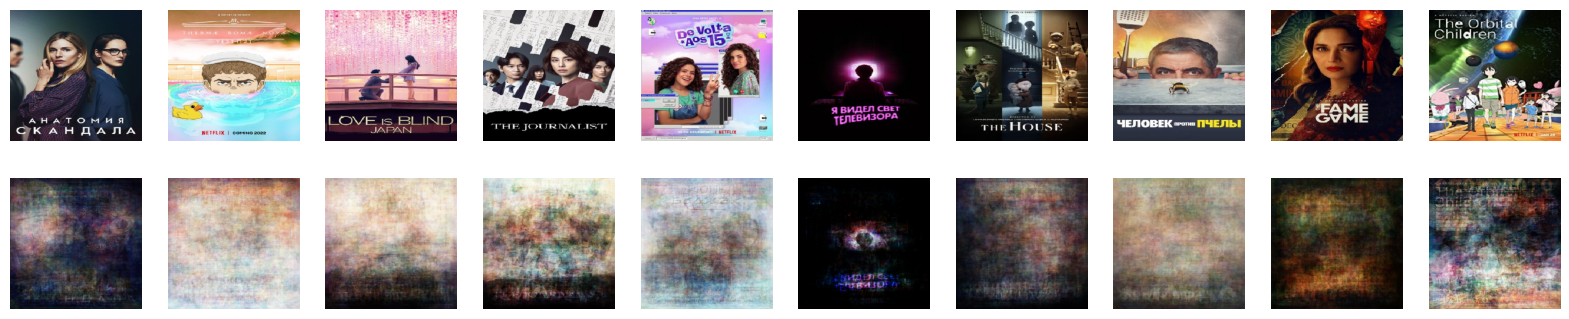

In [7]:
import matplotlib.pyplot as plt

# Получение первых 10 изображений для вывода
decoded_images = autoencoder.predict(original_images[:10])  # Получаем восстановленные изображения

# Отображение оригинальных и восстановленных изображений
plt.figure(figsize=(20, 4))

for i in range(10):
   # Оригинальные изображения
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(original_images[i])
    plt.axis('off')

    # Восстановленные изображения
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_images[i])
    plt.axis('off')

plt.show()


Не несжатых результат получился не лучше, возможно из-за меньшего кол-ва эпох

Перебор гиперпараметров

In [ ]:
!pip install optuna
import optuna
from tensorflow.keras.callbacks import EarlyStopping

# Параметры для модели
img_height, img_width, img_channels = 50, 50, 3
latent_dim = 64


def create_autoencoder(latent_dim, learning_rate, batch_size):

    input_img = Input(shape=(img_height, img_width, img_channels))

    # Кодировщик
    x = Flatten()(input_img)
    x = Dense(128, activation='relu')(x)
    latent_space = Dense(latent_dim, activation='relu')(x)

    # Декодировщик
    x = Dense(128, activation='relu')(latent_space)
    x = Dense(img_height * img_width * img_channels, activation='sigmoid')(x)
    output_img = Reshape((img_height, img_width, img_channels))(x)

    # Создание модели
    autoencoder = Model(input_img, output_img)

    # Компиляция модели
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    return autoencoder


def objective(trial):
    # Генерация случайных гиперпараметров с помощью Optuna
    latent_dim = trial.suggest_int('latent_dim', 32, 128)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])

    # Создание модели
    autoencoder = create_autoencoder(latent_dim, learning_rate, batch_size)


    val_images = images[:500]
    train_images = images[500:]

    # Обучение модели
    autoencoder.fit(train_images, train_images,
                    epochs=50,
                    batch_size=batch_size,
                    validation_data=(val_images, val_images),
                    shuffle=True,
                    verbose=0)  # Отключение вывода

    # Оценка модели на валидационном наборе
    val_loss = autoencoder.evaluate(val_images, val_images, verbose=0)

    return val_loss

# Оптимизация гиперпараметров с помощью Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Выводим результаты
print("Best hyperparameters: ", study.best_params)
print("Best loss: ", study.best_value)


[I 2024-12-24 01:35:14,856] A new study created in memory with name: no-name-f356f376-87ea-4379-be7b-73c44eda3b59
<ipython-input-135-6a9461fd064e>:36: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-3)  # Логарифмическая выборка для learning rate
[I 2024-12-24 01:36:33,540] Trial 0 finished with value: 0.06197280064225197 and parameters: {'latent_dim': 89, 'learning_rate': 0.0005753866420548413, 'batch_size': 16}. Best is trial 0 with value: 0.06197280064225197.
[I 2024-12-24 01:37:57,771] Trial 1 finished with value: 0.06835450977087021 and parameters: {'latent_dim': 110, 'learning_rate': 5.374348894868812e-05, 'batch_size': 16}. Best is trial 0 with value: 0.06197280064225197.
[I 2024-12-24 01:39:06,177] Trial 2 finished with value: 0.08774682134389877 and param

Best hyperparameters:  {'latent_dim': 97, 'learning_rate': 0.00027963305132032527, 'batch_size': 16}
Best loss:  0.05887610837817192


Модель с учетом подобранных гиперпараметров

In [ ]:
# Параметры
img_height, img_width = 50, 50
img_channels = 3
latent_dim = 97
learning_rate = 0.0003
batch_size = 16

In [ ]:
# Функция для создания и компиляции модели
def create_autoencoder(latent_dim, learning_rate, batch_size):
    # Входной слой
    input_img = Input(shape=(img_height, img_width, img_channels))

    # Кодировщик
    x = Flatten()(input_img)
    x = Dense(128, activation='relu')(x)
    latent_space = Dense(latent_dim, activation='relu')(x)

    # Декодировщик
    x = Dense(128, activation='relu')(latent_space)
    x = Dense(img_height * img_width * img_channels, activation='sigmoid')(x)
    output_img = Reshape((img_height, img_width, img_channels))(x)

    # Создание модели
    autoencoder = Model(input_img, output_img)

    # Компиляция модели
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    return autoencoder

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
autoencoder = create_autoencoder(latent_dim, learning_rate, batch_size)
autoencoder.fit(images, images, epochs=50, batch_size=batch_size, shuffle=True)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1128
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0854
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0758
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0718
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0677
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0650
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0617
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0604
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0563
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0555
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0542
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0532
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0526
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0494
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0503
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


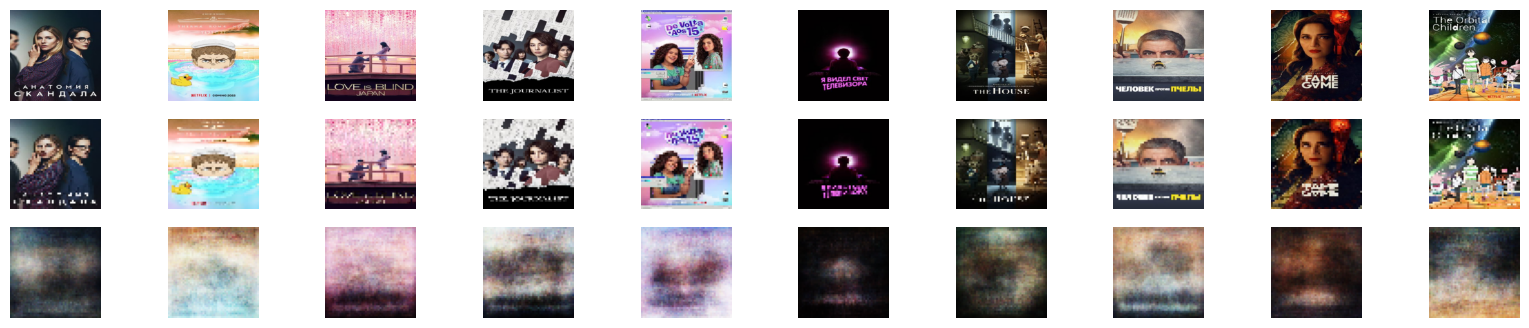

In [ ]:
# Получение первых 10 изображений для вывода
decoded_images = autoencoder.predict(images[:10])  # Получаем восстановленные изображения

# Отображение оригинальных и восстановленных изображений
plt.figure(figsize=(20, 4))

for i in range(10):
   # Оригинальные изображения
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(original_images[i])
    plt.axis('off')

    # Оригинальные сжатые изображения
    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(images[i])
    plt.axis('off')

    # Восстановленные изображения
    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(decoded_images[i])
    plt.axis('off')

plt.show()

Видимо лучший результат с наиболее четкими пикселями был все равно  первоначальный (вероятно, из-за наибольшего кол-ва эпох обучения в том числе)

Попытка доработать реализацию модели

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, UpSampling2D, LeakyReLU, ZeroPadding2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Параметры
img_height, img_width, img_channels = 50, 50, 3
latent_dim = 64  # Размер латентного пространства


input_img = Input(shape=(img_height, img_width, img_channels))

# Кодировщик с использованием сверток
x = Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.2), strides=2, padding='same')(input_img)
x = Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.2), strides=2, padding='same')(x)
x = Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.2), strides=2, padding='same')(x)


x = Flatten()(x)
latent_space = Dense(latent_dim, activation='relu')(x)

# Декодировщик с использованием UpSampling2D
x = Dense(128 * 6 * 6, activation='relu')(latent_space)  # Увеличиваем размерность
x = Reshape((6, 6, 128))(x)  # Преобразуем в форму для последующих сверточных слоев


x = UpSampling2D(size=(2, 2))(x)  # Размер увеличится до 12x12
x = Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.2), padding='same')(x)

x = UpSampling2D(size=(2, 2))(x)  # Размер увеличится до 24x24
x = Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.2), padding='same')(x)

x = UpSampling2D(size=(2, 2))(x)  # Размер увеличится до 48x48
x = Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.2), padding='same')(x)

# Добавляем слой ZeroPadding2D для доведения размера до 50x50
x = ZeroPadding2D(padding=((1, 1), (1, 1)))(x)  # Добавляем 1 пиксель по краям

# Последний слой для получения RGB изображения
output_img = Conv2D(img_channels, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, output_img)


autoencoder.compile(optimizer=Adam(learning_rate=0.0002), loss='mean_absolute_error')

In [ ]:
# Обучение модели
autoencoder.fit(images, images, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 902ms/step - loss: 0.3047
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 873ms/step - loss: 0.2661
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 886ms/step - loss: 0.2397
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 794ms/step - loss: 0.2173
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 796ms/step - loss: 0.1962
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 869ms/step - loss: 0.1869
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 816ms/step - loss: 0.1822
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 809ms/step - loss: 0.1765
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 854ms/step - loss: 0.1788
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 38s 764ms/step - loss: 0.1737
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 808ms/step - loss: 0.1680
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 876ms/step - loss: 0.1647
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 814ms/step - loss: 0.1594
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 871ms/step - loss: 0.1599
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


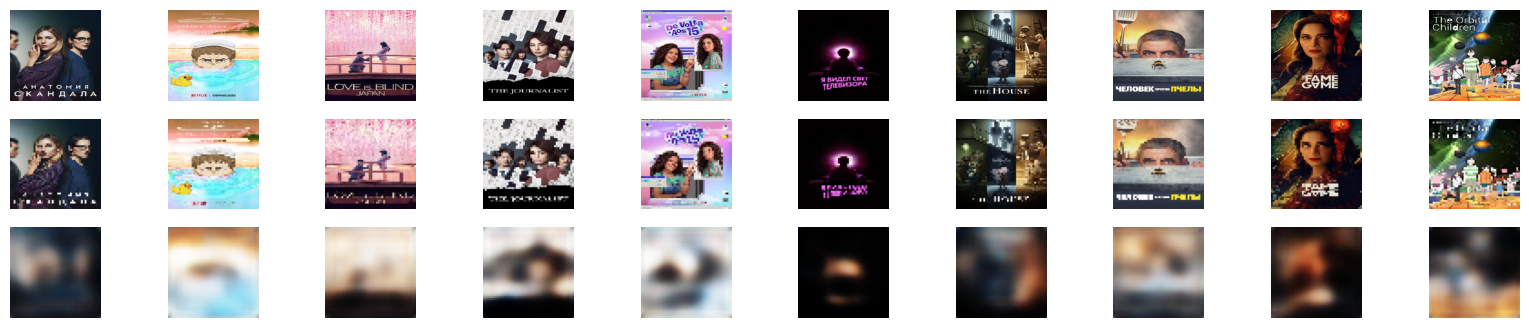

In [ ]:
# Получение первых 10 изображений для вывода
decoded_images = autoencoder.predict(images[:10])

# Отображение оригинальных и восстановленных изображений
plt.figure(figsize=(20, 4))

for i in range(10):
   # Оригинальные изображения
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(original_images[i])
    plt.axis('off')

    # Оригинальные сжатые изображения
    ax = plt.subplot(3, 10, i + 11)
    plt.imshow(images[i])
    plt.axis('off')

    # Восстановленные изображения
    ax = plt.subplot(3, 10, i + 21)
    plt.imshow(decoded_images[i])
    plt.axis('off')

plt.show()


Усложненная модель, которая по итогу показала результат хуже

Создание gif:

In [5]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

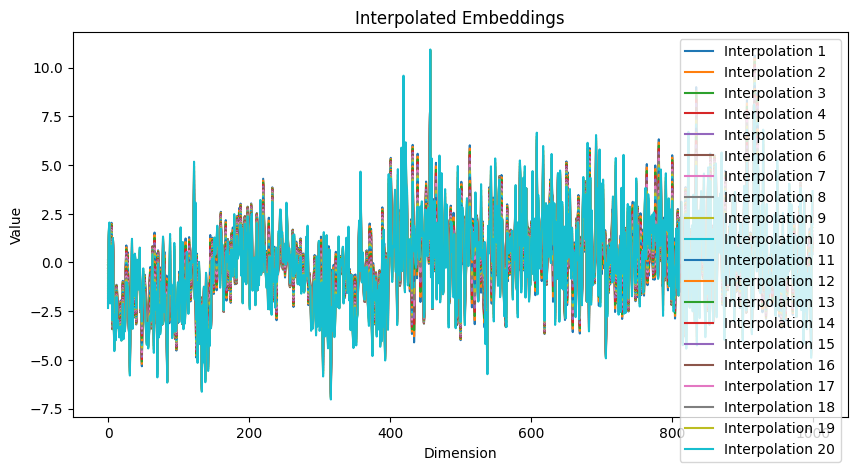

In [6]:
# Функция для загрузки изображения и получения его эмбеддинга
def get_embedding(image_path, model, transform):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        embedding = model(image)
    return embedding

# Параметры
image_a_path = '/content/drive/MyDrive/images/image_1.jpg'
image_b_path = '/content/drive/MyDrive/images/image_10.jpg'
num_interpolations = 20

#решила сделать с ResNet, надеясь на лучшее качество
model = models.resnet50(pretrained=True)
model.eval()

# Определяем преобразования для входных изображений
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


embedding_a = get_embedding(image_a_path, model, transform)
embedding_b = get_embedding(image_b_path, model, transform)
embedding_a_np = embedding_a.numpy().flatten()
embedding_b_np = embedding_b.numpy().flatten()

# Создаем интерполяцию между векторами A и B
interpolated_embeddings = []
for alpha in np.linspace(0, 1, num_interpolations):
    interpolated_vector = (1 - alpha) * embedding_a_np + alpha * embedding_b_np
    interpolated_embeddings.append(interpolated_vector)

interpolated_embeddings = np.array(interpolated_embeddings)

#Интересно было посмотреть на визуализацию, just for fun
plt.figure(figsize=(10, 5))
for i in range(num_interpolations):
    plt.plot(interpolated_embeddings[i], label=f'Interpolation {i+1}')
plt.title('Interpolated Embeddings')
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.legend()
plt.show()


In [40]:
interpolated_embeddings.shape

(20, 1000)

In [17]:
#сохраним исходники тоже
def load_images(image_folder, image_size=(224, 224)):
    original_images = []
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(image_folder, filename)
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Нормализация
            original_images.append(img_array)
    return np.array(original_images)


image_folder = '/content/drive/MyDrive/images'
original_images = load_images(image_folder)
print(f"Загружено изображений: {len(original_images)}")
print(f"Форма изображений: {original_images.shape}")

Загружено изображений: 1028
Форма изображений: (1028, 224, 224, 3)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Параметры для автоэнкодера
img_height = 224  # Высота изображения
img_width = 224  # Ширина изображения
img_channels = 3  # Количество каналов (RGB)
latent_dim = 64  # Размер латентного пространства

# Определение модели AutoEncoder
input_img = Input(shape=(img_height, img_width, img_channels))

# Кодировщик
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
latent_space = Dense(latent_dim, activation='relu')(x)

# Декодировщик
x = Dense(128, activation='relu')(latent_space)
x = Dense(img_height * img_width * img_channels, activation='sigmoid')(x)
output_img = Reshape((img_height, img_width, img_channels))(x)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')  # L2 loss

# Здесь вы должны загрузить ваши изображения в переменную images
# Например, images - это массив numpy с формой (num_samples, img_height, img_width, img_channels)

# Обучение модели
autoencoder.fit(original_images, original_images, epochs=10, batch_size=32, shuffle=True)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - loss: 0.1093
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 895ms/step - loss: 0.0873
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 865ms/step - loss: 0.0790
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 851ms/step - loss: 0.0708
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 816ms/step - loss: 0.0727
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 811ms/step - loss: 0.0664
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 855ms/step - loss: 0.0624
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 850ms/step - loss: 0.0605
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 781ms/step - loss: 0.0577
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 790ms/step - loss: 0.0556


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


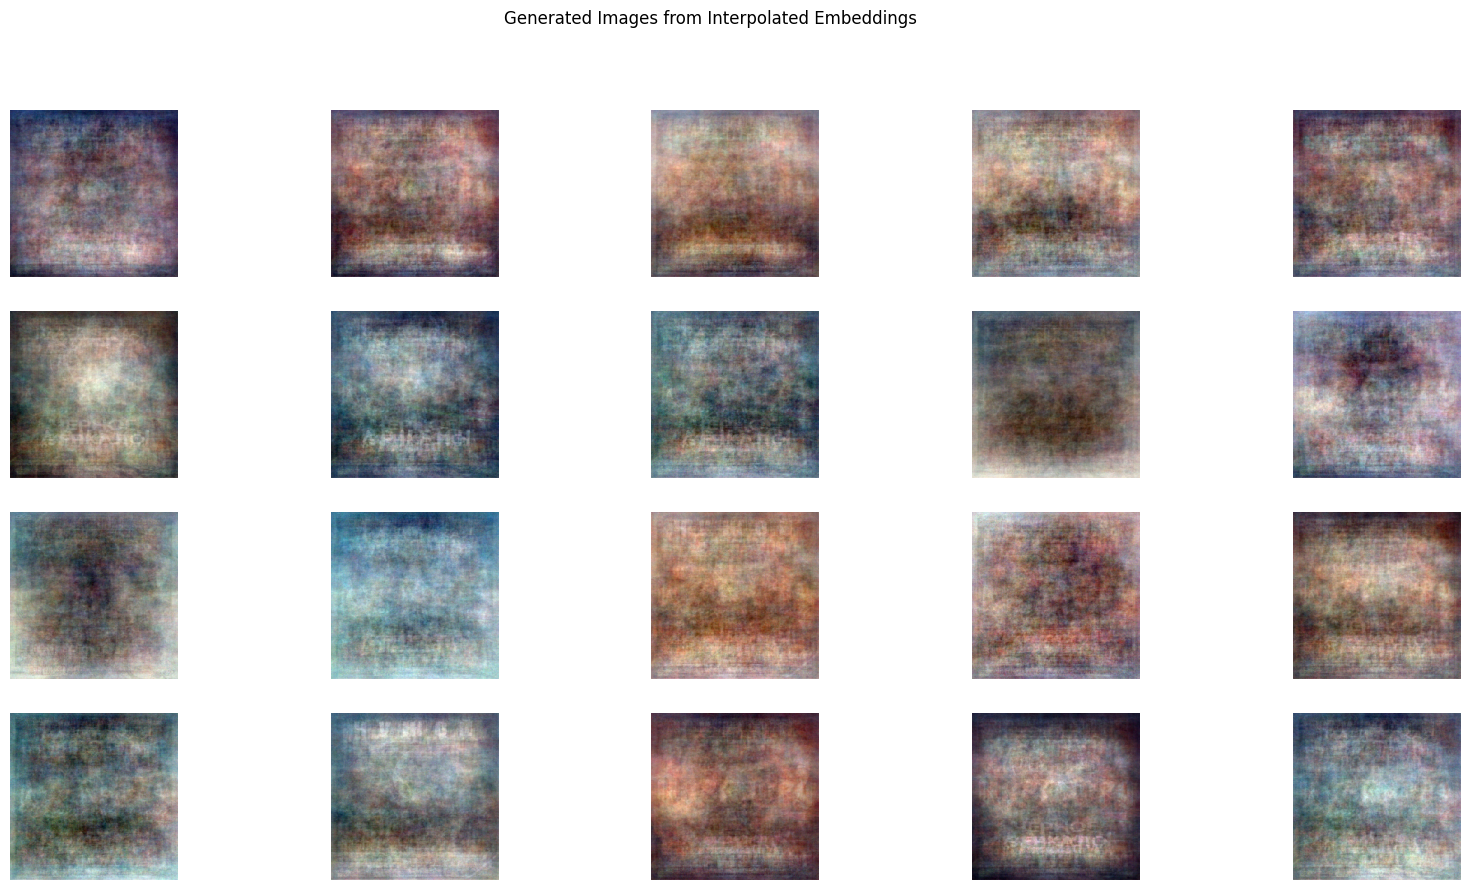

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Проверка качества модели: генерация изображений из случайных латентных векторов
def generate_images_from_embeddings(embeddings):
    images = np.random.normal(size=(embeddings.shape[0], 224, 224, 3))
    generated_images = autoencoder.predict(images)
    return generated_images

# Генерация изображений из интерполированных эмбеддингов
generated_images = generate_images_from_embeddings(interpolated_embeddings)

# Визуализация сгенерированных изображений
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow((generated_images[i] - np.min(generated_images[i])) / (np.max(generated_images[i]) - np.min(generated_images[i])))  # Нормализация для отображения
    plt.axis('off')
plt.suptitle('Generated Images from Interpolated Embeddings')
plt.show()



Что-то похожее на тематику обложек и мерча альбома салуки - BEACH ROCK HOTEL, вайбик такой:)

А если серьезно, где-то можно даже раглядеть настоящие названия фильмов из подборки исходных обложек фильмов, например, хорошо виден "Чужой"

In [43]:
# Сохранение в GIF
imageio.mimsave('interpolation.gif', [np.uint8(img * 255) for img in generated_images], duration=0.1)

print("GIF создан и сохранен как 'interpolation.gif'")


GIF создан и сохранен как 'interpolation.gif'


Гифка получилась более мутная, но в целом какой-то результат есть, несмотря на большие шумы